# Hierarchical Clustering of Strait Time Index (STI) Component Stocks

## Install Python Packages

In [12]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta
import yahoo_fin.stock_info as si

# Plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
# Scaling the data
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering

## Web Scraping of STI Component Stock

In [6]:
df = pd.read_html('https://en.wikipedia.org/wiki/Straits_Times_Index', match='List of STI constituents')
tickerlist = [df[0]['Stock Symbol'][i].split()[1]+'.SI' for i in range(30)]
stocklist = [df[0]['Company'][i] for i in range(30)]
stocklist

['Ascendas Real Estate Investment Trust',
 'CapitaLand Integrated Commercial Trust',
 'CapitaLand Investment',
 'City Developments Limited',
 'ComfortDelGro Corporation',
 'Dairy Farm International Holdings',
 'DBS Group Holdings',
 'Frasers Logistics & Commercial Trust',
 'Genting Singapore PLC',
 'Hongkong Land Holdings',
 'Jardine Cycle & Carriage',
 'Jardine Matheson Holdings Limited',
 'Keppel Corporation',
 'Keppel DC Reit',
 'Mapletree Commercial Trust',
 'Mapletree Industrial Trust',
 'Mapletree Logistics Trust',
 'Oversea-Chinese Banking Corp',
 'SATS',
 'Sembcorp Industries',
 'Singapore Airlines',
 'Singtel',
 'Singapore Exchange',
 'Singapore Technologies Engineering',
 'Thai Beverages',
 'United Overseas Bank',
 'UOL Group',
 'Venture Corporation',
 'Wilmar International',
 'Yangzijiang Shipbuilding Holdings\xa0[zh]']

## Download Financial Fundamental Ratio

In [7]:
data = []
for i, ticker in enumerate(tickerlist):
    d = si.get_quote_table(f"{ticker}")
    s = stocklist[i]
    data.append([s,d['Beta (5Y Monthly)'],d['EPS (TTM)'],d['PE Ratio (TTM)']])

In [8]:
df = pd.DataFrame(data, columns=['stock','beta','eps','pe_ratio'])
df.set_index('stock',inplace=True)
df.dropna(inplace=True)
df

,beta,eps,pe_ratio
stock,,,
Ascendas Real Estate Investment Trust,0.47,0.230,12.22
CapitaLand Integrated Commercial Trust,0.72,0.167,13.17
City Developments Limited,1.19,0.090,86.67
ComfortDelGro Corporation,1.06,0.060,23.50
Dairy Farm International Holdings,0.25,0.076,38.16
DBS Group Holdings,1.14,2.530,11.84
Frasers Logistics & Commercial Trust,0.88,0.247,5.26
Genting Singapore PLC,1.15,0.015,50.67
Jardine Cycle & Carriage,0.67,2.320,13.46


## Scale the Data

In [9]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_values = scaler.fit_transform(df.values)

# Printing pre-processed data
print(df_values)

[[-1.01009372 -0.39663899 -0.3509266 ]
 [-0.17689459 -0.44582475 -0.3285139 ]
 [ 1.38951979 -0.50594068  1.4055212 ]
 [ 0.95625624 -0.52936247 -0.0848053 ]
 [-1.74330896 -0.51687084  0.26105803]
 [ 1.22287996  1.39903152 -0.35989168]
 [ 0.35635286 -0.38336665 -0.51512911]
 [ 1.25620792 -0.56449515  0.55619788]
 [-0.34353441  1.23507899 -0.32167213]
 [-1.24338948  4.11595907 -0.4242987 ]
 [ 0.38968083 -0.13899931 -0.35470137]
 [-1.80996489 -0.42864877 -0.395752  ]
 [ 0.08972914 -0.49501051 -0.23084172]
 [-1.24338948 -0.4473862  -0.28604774]
 [-0.47684627 -0.44192112 -0.41438993]
 [ 0.25636896  0.23574932 -0.37900146]
 [ 1.15622403 -0.56215297  4.6034594 ]
 [ 0.48966472 -0.45987782 -0.19757656]
 [-1.67665303 -0.27172278 -0.0553149 ]
 [-0.6434861  -0.43411386 -0.11689084]
 [ 1.15622403 -0.54341554 -0.26858942]
 [ 0.58964862  1.24288626 -0.36390237]
 [ 0.35635286 -0.29514457 -0.16808617]
 [-0.24355052  0.30601469 -0.28132927]
 [-0.47684627 -0.25220463 -0.40613262]
 [ 1.42284775 -0.42162223

## Dendrogram

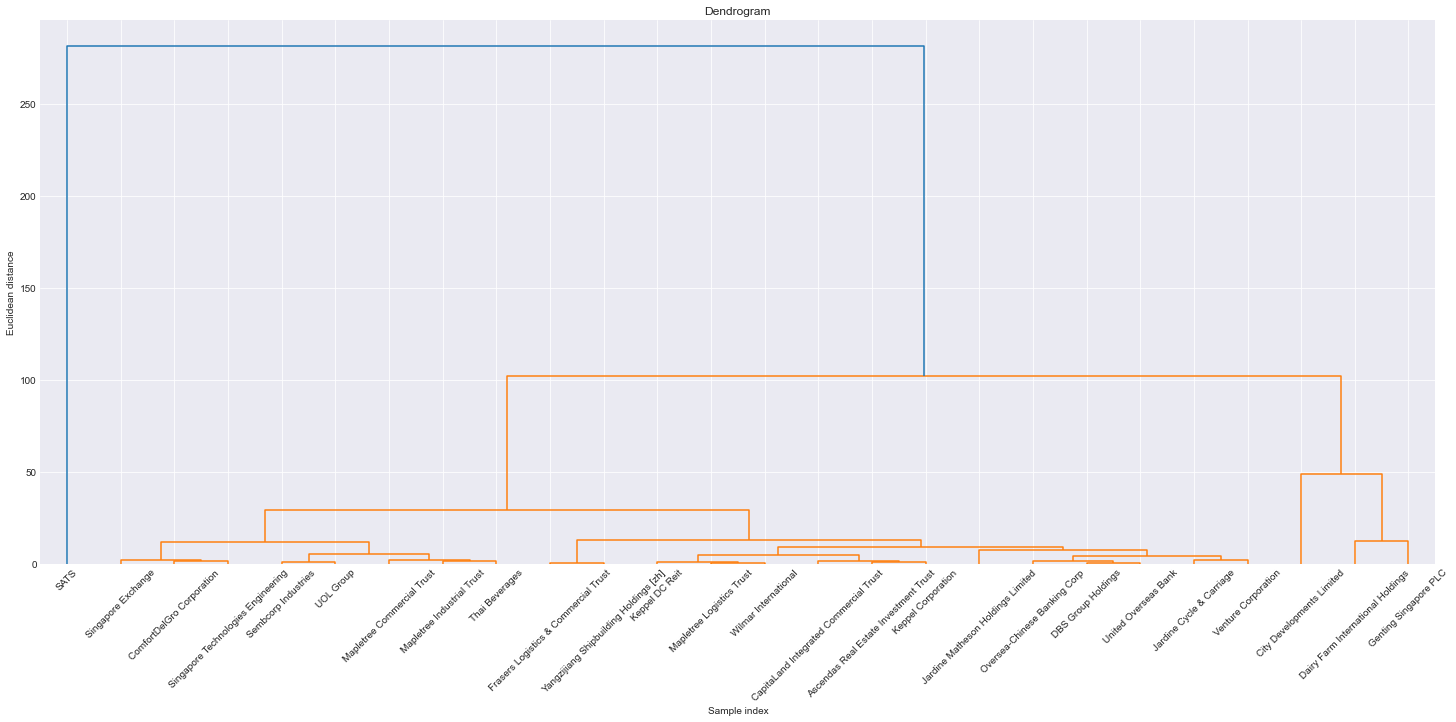

In [17]:
# Plot a dendrogram
plt.figure(figsize=(25, 10))  
plt.title("Dendrograms")  

# Create a dendrogram
sc.dendrogram(sc.linkage(df, method='ward'),labels=df.index)

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

## Hierarchical Clustering

In [14]:
# Instantiate the clustering algorithm
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Using the fit function
cluster.fit(df_values) 
df['clusters']=cluster.labels_
df

,beta,eps,pe_ratio,clusters
stock,,,,
Ascendas Real Estate Investment Trust,0.47,0.230,12.22,1
CapitaLand Integrated Commercial Trust,0.72,0.167,13.17,0
City Developments Limited,1.19,0.090,86.67,0
ComfortDelGro Corporation,1.06,0.060,23.50,0
Dairy Farm International Holdings,0.25,0.076,38.16,1
DBS Group Holdings,1.14,2.530,11.84,4
Frasers Logistics & Commercial Trust,0.88,0.247,5.26,0
Genting Singapore PLC,1.15,0.015,50.67,0
Jardine Cycle & Carriage,0.67,2.320,13.46,4


## Visualize the Clusters

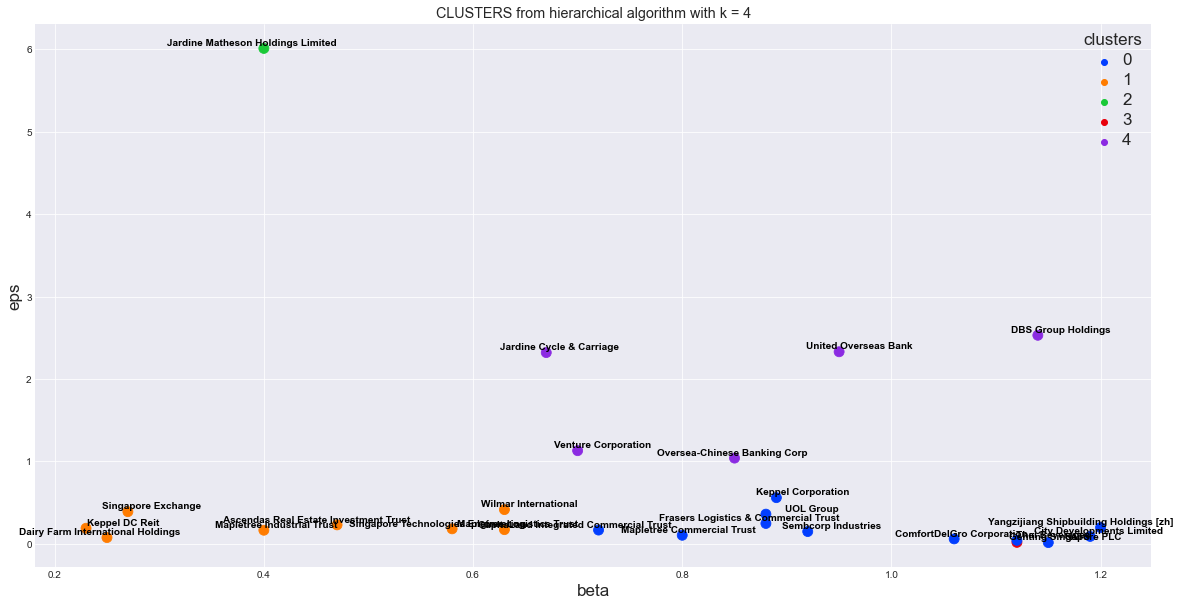

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Set graph size
plt.figure(figsize=(20, 10))

# Set x and y axis labels
ax = sns.scatterplot(y="eps", x="beta", edgecolor='face',hue="clusters", data=df, palette='bright', s=100)

# Plot the graph
plt.xlabel('beta', size=17)
plt.ylabel('eps', size=17)
plt.setp(ax.get_legend().get_texts(), fontsize='17')  
plt.setp(ax.get_legend().get_title(), fontsize='17')  
plt.title('CLUSTERS from hierarchical algorithm with k = 4', fontsize='x-large')

# Label individual elements
for i in range(0, df.shape[0]):
    plt.text(df.beta[i]+0.07, df['eps'][i]+0.01, df.index[i], 
             horizontalalignment='right',
             verticalalignment='bottom', size='medium', 
             color='black', weight='semibold')